# Simple Linear Regression
1. Reading and Understing the Data
2. Training the model
3. Residual Analysis
4. Predicting and evaluating the model

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("../dataset/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


/Users/shishir_kumar/shishir/code/virtaualEnvs/conda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


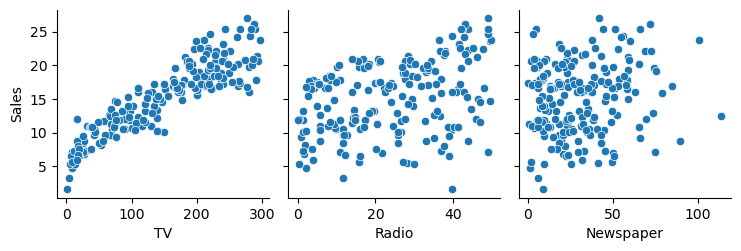

In [7]:
sns.pairplot(data = df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

<Axes: >

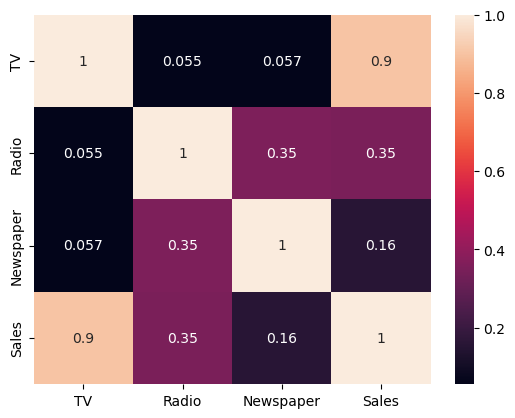

In [8]:
sns.heatmap(df.corr(), annot=True)

## To create Liner Regression model we will follow below steps
- Create X and y.
- Create train and test set (70-30, 80-20).
- Train your model on the training set(i.e learn the coefficients).
- Evaluate the model (training set and Test set).

In [9]:
# create X and y
X = df['TV']
y = df['Sales']

In [44]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
X_train_sm = sm.add_constant(X_train)
X_train.shape

(140,)

In [11]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [12]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.52e-52
Time:                        12:46:34   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

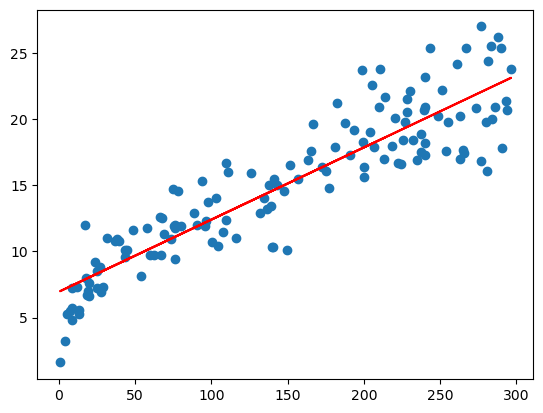

In [18]:
y_train_predicated = lr_model.predict(X_train_sm)
plt.scatter(X_train, y_train)
#plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')
#below os better way of doing this
plt.plot(X_train, y_train_predicated, 'r')
plt.show()

# Step 3. Residual Analysis

In [14]:
# error = function(y_train, y_train_predicated)

In [19]:
res = y_train - y_train_predicated

/var/folders/h5/h1tlh3sd2rs2nzc3pp2hn8480000gn/T/ipykernel_4368/3256360459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'residual Plot')

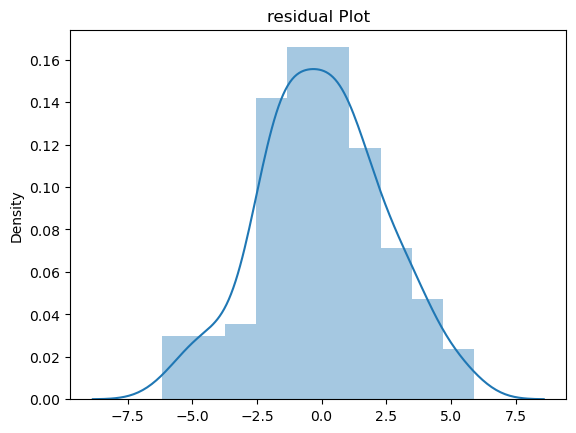

In [27]:
plt.figure()
sns.distplot(res)
plt.title("residual Plot")

In [28]:
# error should be normally distributed 
# and there should not be any visible patterns in the error terms

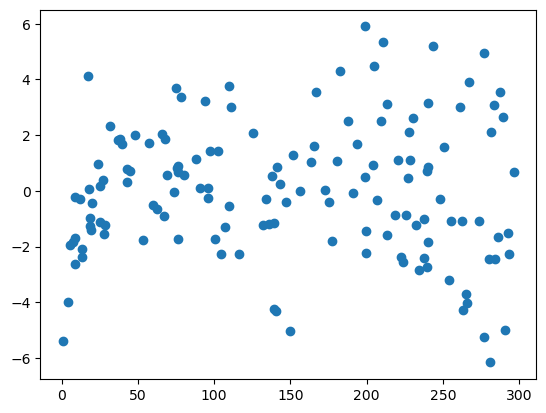

In [30]:
plt.scatter(X_train, res)
plt.show()

Here we can see that residual are normally distributed and scattered around y=0 and are not forming any kind of pattern or cluster.
So we can say the model fits well

# Step 4: Predictions and Evaluations on the Test Set

In [31]:
# predictions on the test set(y_test_pred)
# evaluate the model, r-squared, on the test

In [45]:
# add constant/intercept to test set
x_test_sm = sm.add_constant(X_test)

# predict on test
y_test_pred = lr_model.predict(x_test_sm)

In [46]:
X_train_sm.shape

(140, 2)

In [48]:
# evaualte the model(r-squared), on the test
r2 = r2_score(y_true = y_test, y_pred=y_test_pred)
r2

0.7921031601245658

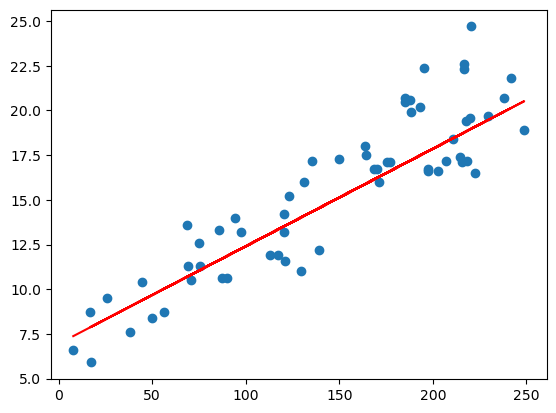

In [51]:

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()